In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re
import random

In [2]:
#getting source html code
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'  
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')



In [3]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_con

In [4]:
#scraping table content
soup.find_all('table')[0]


<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                              

In [5]:
#printing table coloumns
headers = [header.text.strip() for header in soup.find_all('th') if not header.text.strip().isdigit()]
seen = set()
unique_headers = [x for x in headers if x not in seen and not seen.add(x)]
print(unique_headers)


['Party', 'Won', 'Leading', 'Total']


In [6]:
# Extracting rows
rows = []
for row in soup.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    rows.append(cols)

# Creating DataFrame
df = pd.DataFrame(rows, columns=unique_headers[:len(rows[0])])



In [7]:
new_columns = ['Party', 'Won', 'Total']
df_new = df[new_columns]
df.index.name = 'Serial Number'
print(df_new)

                                                           Party  Won Total
Serial Number                                                              
0                                   Bharatiya Janata Party - BJP  240   240
1                                 Indian National Congress - INC   99    99
2                                           Samajwadi Party - SP   37    37
3                            All India Trinamool Congress - AITC   29    29
4                                Dravida Munnetra Kazhagam - DMK   22    22
5                                             Telugu Desam - TDP   16    16
6                                   Janata Dal  (United) - JD(U)   12    12
7                 Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9     9
8              Nationalist Congress Party – Sharadchandra Paw...    8     8
9                                                Shiv Sena - SHS    7     7
10                        Lok Janshakti Party(Ram Vilas) - LJPRV    5     5
11          

# 1. BJP secured the highest vote percentage (36.56%) and won the most seats (240), showing popular suppport to party.
# 6. National parties won 62% of the seats, while regional parties won 38% among all the seats in Lok sabha electoins.

C:\Users\surya\anaconda3\envs\moviebert34\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\surya\anaconda3\envs\moviebert34\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


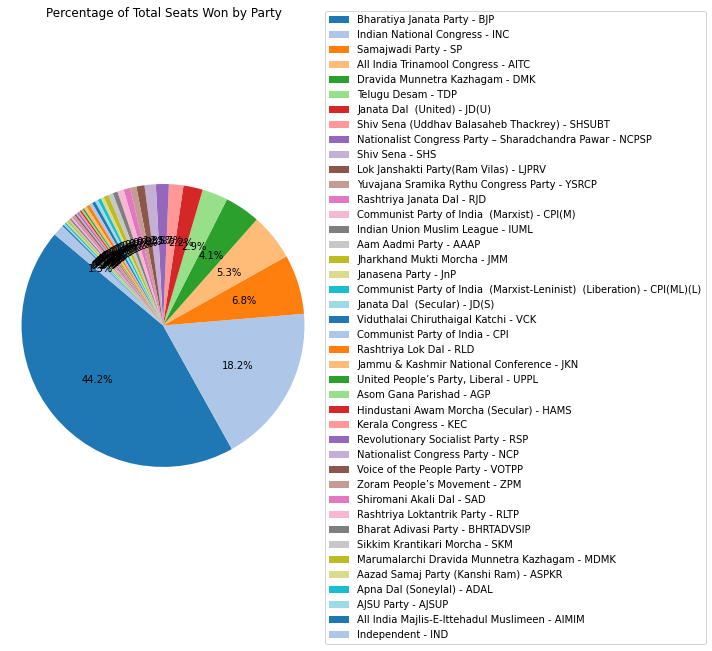

In [8]:

# creating Pie chart data
party = df_new['Party'].values
won = df_new['Won'].values
total = df_new['Total'].values

# Convert 'Won' and 'Total' to numeric type (int or float)
df_new['Won'] = pd.to_numeric(df_new['Won'])
df_new['Total'] = pd.to_numeric(df_new['Total'])


df_new['Percentage'] = (df_new['Won'] / df_new['Total']) * 100
df_new['Percentage'] = df_new['Percentage'].round(1)



# Plotting pie chart
plt.figure(figsize=(10, 10))  
colors = plt.cm.tab20.colors[:len(df_new)]  
patches, texts, autotexts = plt.pie(df_new['Total'], labels=None, autopct='%1.1f%%', startangle=140, colors=colors)

# Add party names as annotations below the pie chart
plt.legend(df_new['Party'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Total Seats Won by Party')
plt.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

# Pie chart of vote share for each party


In [9]:
# finding pichart scarp in the script 
canvas = soup.find('canvas', id='piChart')

In [10]:
import re
if canvas:
    
    chart_data = None
    scripts = soup.find_all('script')
    scripts=str(scripts)
    print(scripts)

[<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_config||{},a.BOOMR_config.PageParams=a.BOOMR_config.PageParams||{},a.BOOMR_config.PageParams.pci=!0,e="https://s2.go-mpulse.net/boomerang/";if(window.BOOMR_API_key="C8JDA-BHWH8-9MQ5M-HKZCP-GH7SB",function(){function n(e){a.BOOMR_onload=e&&e.timeStamp||(new Date).getTime()}if(!a.BOOMR||!a.BOOMR.version&&!a.BOOMR.snippetExecuted){a.BOOMR=a.BOOMR||{},a.BOOMR.snippetExecuted=!0;var i,_,o,r=document.createElement("iframe");if(a[t])a[t]("load",n,!1);else if(a.attachEvent)a.attachEvent("onload",n);r.src="javascript:void(0)",r.title="",r.role="presentation",(r.frameElement||r).style.cssText="width:0;height:0;border:0;display:none;",o=document.getElementsByTagName("script")[0],o.parentNode.insertBefore(r,o);try{_=r.contentWindow.document}catch(O){i=document.domain,r.src="javascript:var d=document.open();d.domain='"+i+"';void(0);",_=r.contentWindow.document}_.open()._l=

In [11]:
import re
# Define a regular expression pattern to match xValues array
pattern = r"var\s+xValues\s*=\s*(\[.*?\]);"

# Find all occurrences of xValues using findall
matches = re.findall(pattern,scripts, re.DOTALL)

# Process each match
for idx, match in enumerate(matches):
    print(f"xValues array {idx + 1}: {match}")

xValues array 1: ['BJP','INC','SP','AITC','DMK','TDP','JD(U)','SHSUBT','NCPSP','SHS','Others']
xValues array 2: ["AITC", "BJP", "HSPDP", "INC", "JD", "NOTA", "NPEP", "PDF", "UDP", "Other"]
xValues array 3: ['AAAP{1.11%}','ADAL{0.13%}','ADMK{1.39%}','AGP{0.20%}','AIFB{0.04%}','AIMIM{0.22%}','AITC{4.37%}','AIUDF{0.10%}','AJSUP{0.07%}','BHRS{0.57%}','BJD{1.46%}','BJP{36.56%}','BOPF{0.12%}','BSP{2.04%}','CPI{0.49%}','CPI(M){1.76%}','CPI(ML)(L){0.27%}','DMDK{0.17%}','DMK{1.82%}','INC{21.19%}','INLD{0.04%}','IUML{0.27%}','JD(S){0.34%}','JD(U){1.25%}','JKN{0.18%}','JKNPPB{0.00%}','JKPDP{0.07%}','JMM{0.41%}','JNJP{0.02%}','KEC(M){0.04%}','LJPRV{0.44%}','MNF{0.02%}','NCP{0.32%}','NCPSP{0.92%}','NDPP{0.05%}','NOTA{0.99%}','NPEP{0.06%}','NPF{0.05%}','RJD{1.57%}','RLTP{0.09%}','RVLTGONP{0.01%}','SAD{0.28%}','SDF{0.01%}','SHS{1.15%}','SHSUBT{1.48%}','SKM{0.03%}','SP{4.58%}','TDP{1.98%}','UDP{0.01%}','UPPL{0.08%}','VOTPP{0.09%}','YSRCP{2.06%}','ZPM{0.03%}','Others{7.03%}',]
xValues array 4: ["AITC",

In [12]:
piechart=matches[2]

print(piechart)

['AAAP{1.11%}','ADAL{0.13%}','ADMK{1.39%}','AGP{0.20%}','AIFB{0.04%}','AIMIM{0.22%}','AITC{4.37%}','AIUDF{0.10%}','AJSUP{0.07%}','BHRS{0.57%}','BJD{1.46%}','BJP{36.56%}','BOPF{0.12%}','BSP{2.04%}','CPI{0.49%}','CPI(M){1.76%}','CPI(ML)(L){0.27%}','DMDK{0.17%}','DMK{1.82%}','INC{21.19%}','INLD{0.04%}','IUML{0.27%}','JD(S){0.34%}','JD(U){1.25%}','JKN{0.18%}','JKNPPB{0.00%}','JKPDP{0.07%}','JMM{0.41%}','JNJP{0.02%}','KEC(M){0.04%}','LJPRV{0.44%}','MNF{0.02%}','NCP{0.32%}','NCPSP{0.92%}','NDPP{0.05%}','NOTA{0.99%}','NPEP{0.06%}','NPF{0.05%}','RJD{1.57%}','RLTP{0.09%}','RVLTGONP{0.01%}','SAD{0.28%}','SDF{0.01%}','SHS{1.15%}','SHSUBT{1.48%}','SKM{0.03%}','SP{4.58%}','TDP{1.98%}','UDP{0.01%}','UPPL{0.08%}','VOTPP{0.09%}','YSRCP{2.06%}','ZPM{0.03%}','Others{7.03%}',]


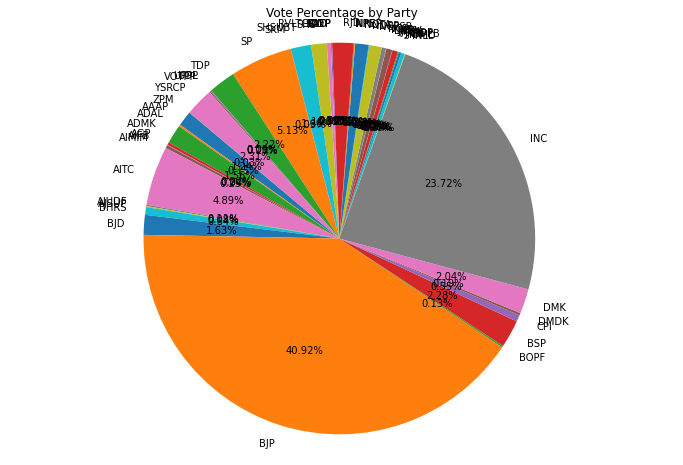

In [13]:
import matplotlib.pyplot as plt
import re

# Given data (same as before)
piechart = ['AAAP{1.11%}', 'ADAL{0.13%}', 'ADMK{1.39%}', 'AGP{0.20%}', 'AIFB{0.04%}', 'AIMIM{0.22%}', 'AITC{4.37%}', 
            'AIUDF{0.10%}', 'AJSUP{0.07%}', 'BHRS{0.57%}', 'BJD{1.46%}', 'BJP{36.56%}', 'BOPF{0.12%}', 'BSP{2.04%}', 
            'CPI{0.49%}', 'CPI(M){1.76%}', 'CPI(ML)(L){0.27%}', 'DMDK{0.17%}', 'DMK{1.82%}', 'INC{21.19%}', 
            'INLD{0.04%}', 'IUML{0.27%}', 'JD(S){0.34%}', 'JD(U){1.25%}', 'JKN{0.18%}', 'JKNPPB{0.00%}', 
            'JKPDP{0.07%}', 'JMM{0.41%}', 'JNJP{0.02%}', 'KEC(M){0.04%}', 'LJPRV{0.44%}', 'MNF{0.02%}', 
            'NCP{0.32%}', 'NCPSP{0.92%}', 'NDPP{0.05%}', 'NOTA{0.99%}', 'NPEP{0.06%}', 'NPF{0.05%}', 'RJD{1.57%}', 
            'RLTP{0.09%}', 'RVLTGONP{0.01%}', 'SAD{0.28%}', 'SDF{0.01%}', 'SHS{1.15%}', 'SHSUBT{1.48%}', 
            'SKM{0.03%}', 'SP{4.58%}', 'TDP{1.98%}', 'UDP{0.01%}', 'UPPL{0.08%}', 'VOTPP{0.09%}', 'YSRCP{2.06%}', 
            'ZPM{0.03%}', 'Others{7.03%}']

# Extracting party names and percentages (same as before)
parties = []
percentages = []
for item in piechart:
    match = re.match(r"([A-Z]+)\{([\d.]+)%\}", item)
    if match:
        parties.append(match.group(1))
        percentages.append(float(match.group(2)))

# Plotting pie chart (same as before)
plt.figure(figsize=(12, 8))
plt.pie(percentages, labels=parties, autopct='%1.2f%%', startangle=140, normalize=True)
plt.title('Vote Percentage by Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()





# 2. Even though Indian National Congress (INC) secured the second-highest vote percentage (21.19%) but won significantly fewer seats (99), indicating a disparity between vote share and seat allocation.

# 3. The distribution of vote shares ranges widely from major parties like "BJP" and "INC" to smaller parties with less than 1% vote share, showing that BJP and INC as major parties participating and also shows the diversity of political representation

In [14]:
# Creating a DataFrame for table
data = {
    'Party': parties,
    'Percentage': percentages
}
df = pd.DataFrame(data)
df.index.name = 'Serial Number'

# Displaying DataFrame
print("\nTable of Party-wise Vote Percentages:")
print(df)


Table of Party-wise Vote Percentages:
                  Party  Percentage
Serial Number                      
0                  AAAP        1.11
1                  ADAL        0.13
2                  ADMK        1.39
3                   AGP        0.20
4                  AIFB        0.04
5                 AIMIM        0.22
6                  AITC        4.37
7                 AIUDF        0.10
8                 AJSUP        0.07
9                  BHRS        0.57
10                  BJD        1.46
11                  BJP       36.56
12                 BOPF        0.12
13                  BSP        2.04
14                  CPI        0.49
15                 DMDK        0.17
16                  DMK        1.82
17                  INC       21.19
18                 INLD        0.04
19                 IUML        0.27
20                  JKN        0.18
21               JKNPPB        0.00
22                JKPDP        0.07
23                  JMM        0.41
24                 JNJP  

# web scraping data from each state and making table and pie chart

In [15]:
snippet_div = soup.find('div', class_='flter-btns')

# Extract the HTML snippet
if snippet_div:
    html_snippet = snippet_div.prettify()
else:
    print("Snippet div not found in the HTML document.")
    
# Parse HTML using BeautifulSoup
soup = BeautifulSoup(html_snippet, 'html.parser')
select_element = soup.find('select', {'id': 'ctl00_ContentPlaceHolder1_Result1_ddlState'})


state_dict = {}

# Extract options and build the dictionary
if select_element:
    options = select_element.find_all('option')
    for option in options:
        if option['value'] and option['value'].startswith('S'):  # Filter out states only (starting with 'S')
            state_code = option['value']
            state_name = option.text.strip()
            state_dict[state_code] = state_name

# Print the dictionary
print(state_dict)

{'S01': 'Andhra Pradesh', 'S02': 'Arunachal Pradesh', 'S03': 'Assam', 'S04': 'Bihar', 'S26': 'Chhattisgarh', 'S05': 'Goa', 'S06': 'Gujarat', 'S07': 'Haryana', 'S08': 'Himachal Pradesh', 'S27': 'Jharkhand', 'S10': 'Karnataka', 'S11': 'Kerala', 'S12': 'Madhya Pradesh', 'S13': 'Maharashtra', 'S14': 'Manipur', 'S15': 'Meghalaya', 'S16': 'Mizoram', 'S17': 'Nagaland', 'S18': 'Odisha', 'S19': 'Punjab', 'S20': 'Rajasthan', 'S21': 'Sikkim', 'S22': 'Tamil Nadu', 'S29': 'Telangana', 'S23': 'Tripura', 'S24': 'Uttar Pradesh', 'S28': 'Uttarakhand', 'S25': 'West Bengal'}


In [16]:
#function to extract tabel and plot a piechart for each state

base_url = 'https://results.eci.gov.in/PcResultGenJune2024/'

def scrape_state_election_results(state_code):
    url = f'{base_url}partywiseresult-{state_code}.htm'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table=soup.find_all('table')[0]
        headers = [header.text.strip() for header in soup.find_all('th') if not header.text.strip().isdigit()]
        seen = set()
        unique_headers = [x for x in headers if x not in seen and not seen.add(x)]
        # Extract rows
        rows = []
        for row in soup.find('tbody').find_all('tr'):
            cols = row.find_all('td')
            cols = [col.text.strip() for col in cols]
            rows.append(cols)

        # Create DataFrame
        df = pd.DataFrame(rows, columns=unique_headers[:len(rows[0])])
        new_columns = ['Party', 'Won']
        df_new = df[new_columns]
        df.index.name = 'Serial Number'
        print(df_new)
        
        # Convert numerical columns to numeric types
        df['Won'] = pd.to_numeric(df['Won'])

        
        # Generate random colors for pie chart slices
        colors = [plt.cm.tab20c(i/float(len(df.index))) for i in range(len(df.index))]
        
        # Plotting the pie chart
        plt.figure(figsize=(10, 6))
        plt.pie(df['Won'], labels=df['Party'], autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f'Election Results Pie Chart - {state_code}')
        plt.axis('equal')   
        
        # Save or show the plot
        plt.tight_layout()
        plt.savefig(f'pie_chart_{state_code}.png')   
        plt.show()  

       




In [17]:
print(state_dict)

{'S01': 'Andhra Pradesh', 'S02': 'Arunachal Pradesh', 'S03': 'Assam', 'S04': 'Bihar', 'S26': 'Chhattisgarh', 'S05': 'Goa', 'S06': 'Gujarat', 'S07': 'Haryana', 'S08': 'Himachal Pradesh', 'S27': 'Jharkhand', 'S10': 'Karnataka', 'S11': 'Kerala', 'S12': 'Madhya Pradesh', 'S13': 'Maharashtra', 'S14': 'Manipur', 'S15': 'Meghalaya', 'S16': 'Mizoram', 'S17': 'Nagaland', 'S18': 'Odisha', 'S19': 'Punjab', 'S20': 'Rajasthan', 'S21': 'Sikkim', 'S22': 'Tamil Nadu', 'S29': 'Telangana', 'S23': 'Tripura', 'S24': 'Uttar Pradesh', 'S28': 'Uttarakhand', 'S25': 'West Bengal'}


ANDHRA PRADESH*******************************************************************************
                                                       Party Won
Serial Number                                                   
0                                         Telugu Desam - TDP  16
1              Yuvajana Sramika Rythu Congress Party - YSRCP   4
2                               Bharatiya Janata Party - BJP   3
3                                       Janasena Party - JnP   2


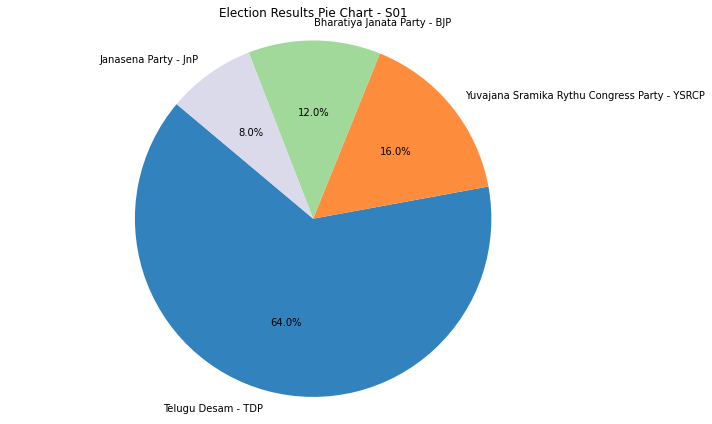

ARUNACHAL PRADESH*******************************************************************************
                                      Party Won
Serial Number                                  
0              Bharatiya Janata Party - BJP   2


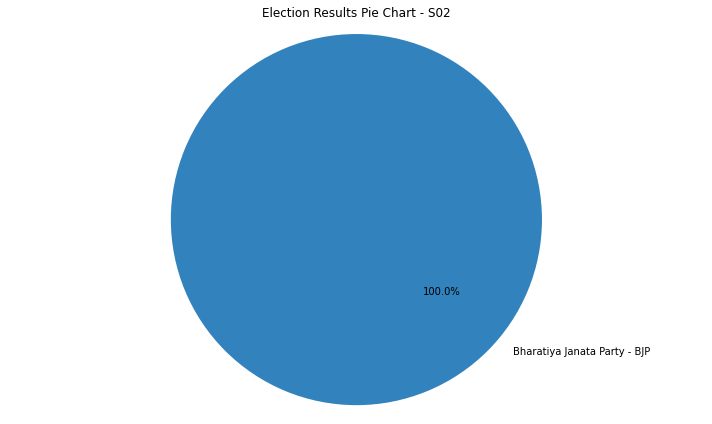

ASSAM*******************************************************************************
                                               Party Won
Serial Number                                           
0                       Bharatiya Janata Party - BJP   9
1                     Indian National Congress - INC   3
2              United People’s Party, Liberal - UPPL   1
3                           Asom Gana Parishad - AGP   1


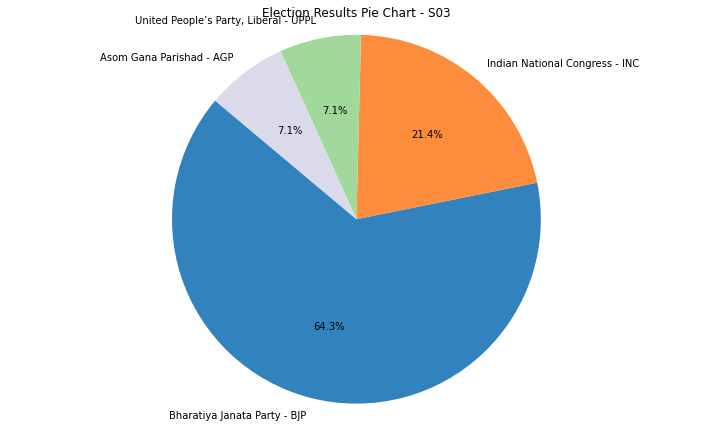

BIHAR*******************************************************************************
                                                           Party Won
Serial Number                                                       
0                                   Janata Dal  (United) - JD(U)  12
1                                   Bharatiya Janata Party - BJP  12
2                         Lok Janshakti Party(Ram Vilas) - LJPRV   5
3                                     Rashtriya Janata Dal - RJD   4
4                                 Indian National Congress - INC   3
5              Communist Party of India  (Marxist-Leninist)  ...   2
6                        Hindustani Awam Morcha (Secular) - HAMS   1
7                                              Independent - IND   1


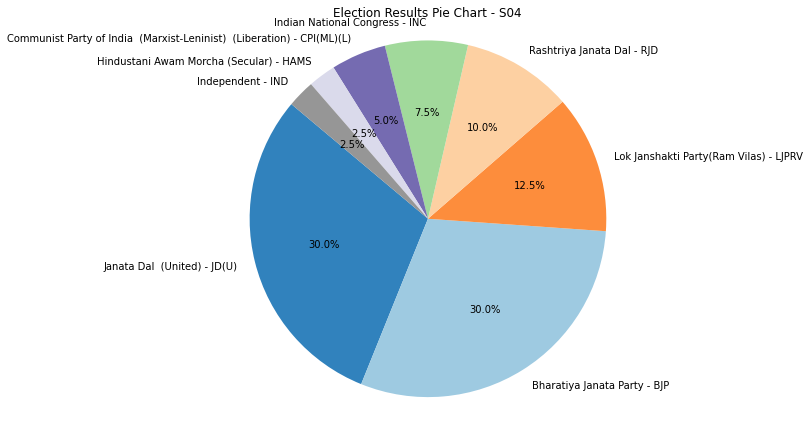

CHHATTISGARH*******************************************************************************
                                        Party Won
Serial Number                                    
0                Bharatiya Janata Party - BJP  10
1              Indian National Congress - INC   1


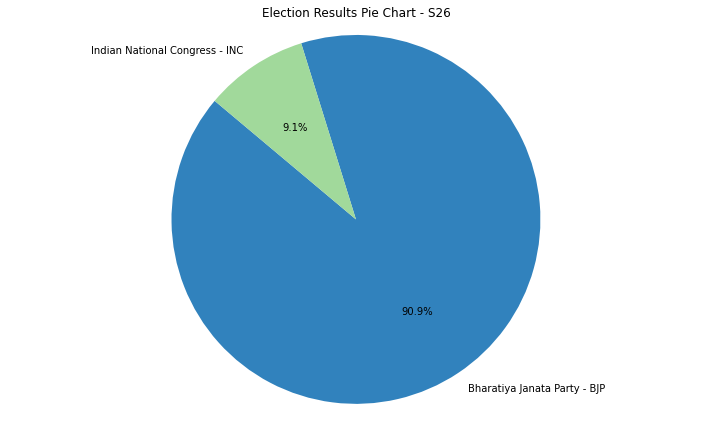

GOA*******************************************************************************
                                        Party Won
Serial Number                                    
0                Bharatiya Janata Party - BJP   1
1              Indian National Congress - INC   1


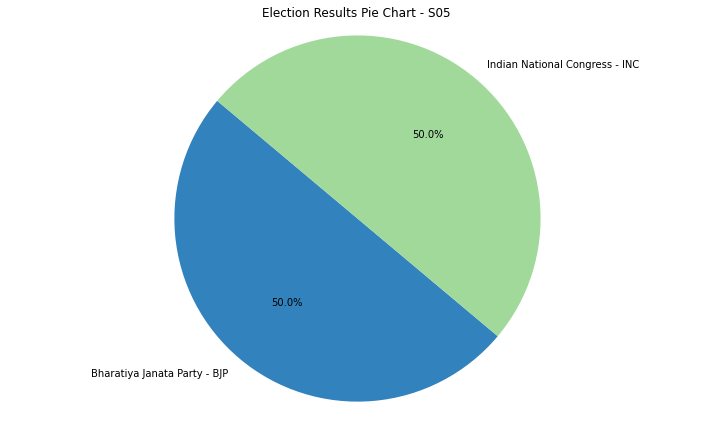

GUJARAT*******************************************************************************
                                        Party Won
Serial Number                                    
0                Bharatiya Janata Party - BJP  25
1              Indian National Congress - INC   1


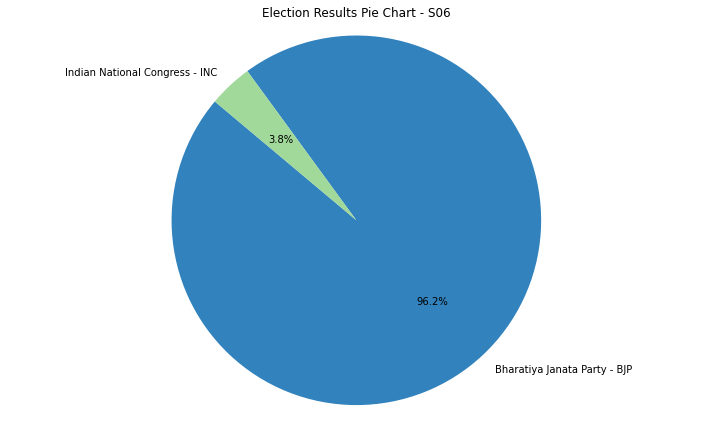

HARYANA*******************************************************************************
                                        Party Won
Serial Number                                    
0              Indian National Congress - INC   5
1                Bharatiya Janata Party - BJP   5


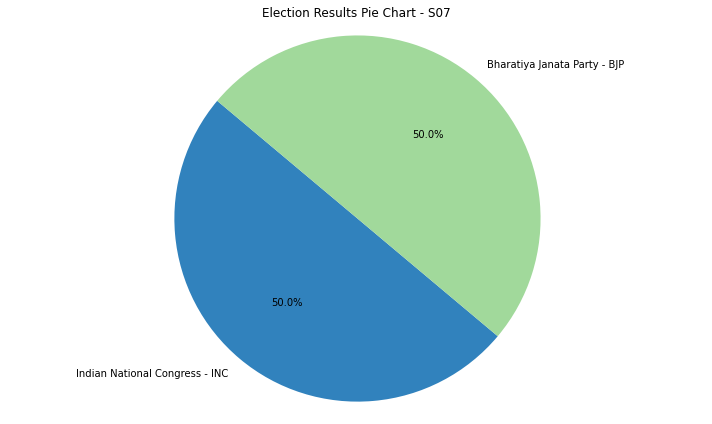

HIMACHAL PRADESH*******************************************************************************
                                      Party Won
Serial Number                                  
0              Bharatiya Janata Party - BJP   4


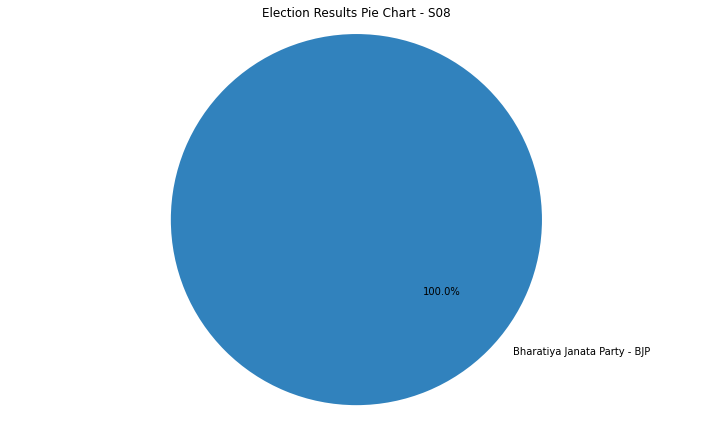

JHARKHAND*******************************************************************************
                                        Party Won
Serial Number                                    
0                Bharatiya Janata Party - BJP   8
1                Jharkhand Mukti Morcha - JMM   3
2              Indian National Congress - INC   2
3                          AJSU Party - AJSUP   1


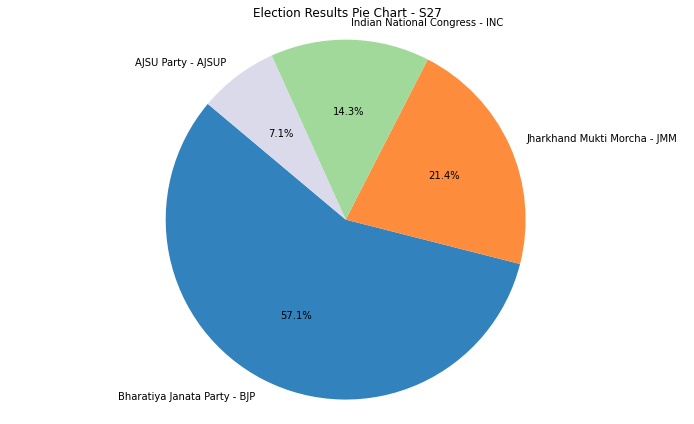

KARNATAKA*******************************************************************************
                                        Party Won
Serial Number                                    
0                Bharatiya Janata Party - BJP  17
1              Indian National Congress - INC   9
2               Janata Dal  (Secular) - JD(S)   2


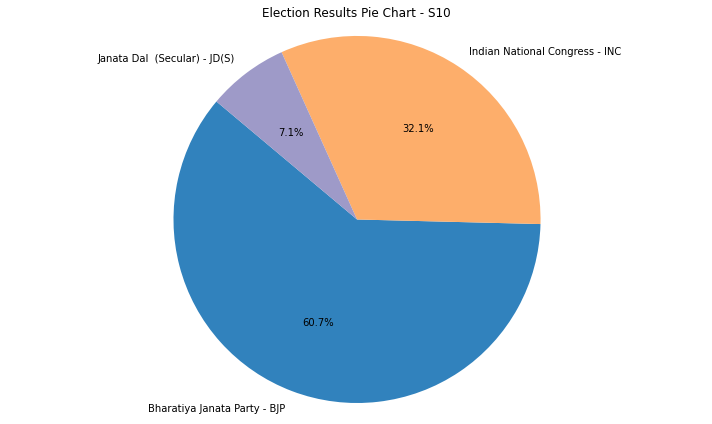

KERALA*******************************************************************************
                                                      Party Won
Serial Number                                                  
0                            Indian National Congress - INC  14
1                         Indian Union Muslim League - IUML   2
2              Communist Party of India  (Marxist) - CPI(M)   1
3                              Bharatiya Janata Party - BJP   1
4                                     Kerala Congress - KEC   1
5                       Revolutionary Socialist Party - RSP   1


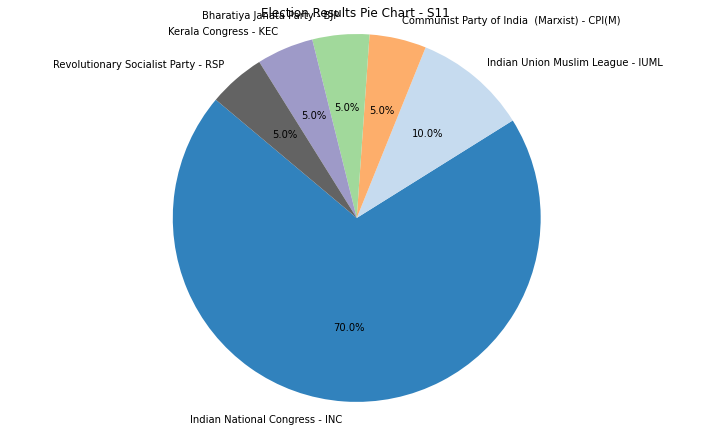

MADHYA PRADESH*******************************************************************************
                                      Party Won
Serial Number                                  
0              Bharatiya Janata Party - BJP  29


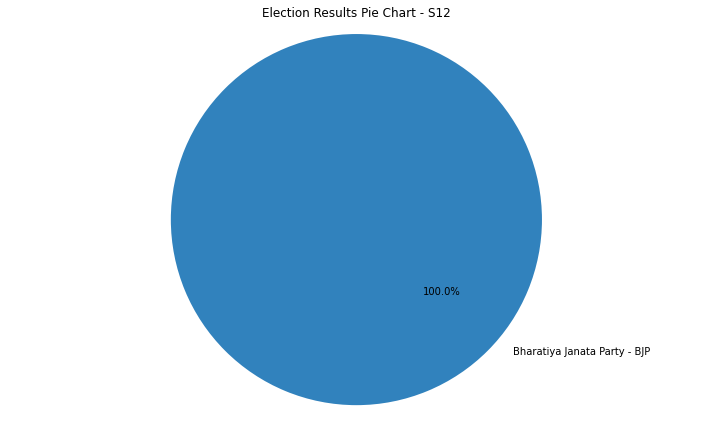

MAHARASHTRA*******************************************************************************
                                                           Party Won
Serial Number                                                       
0                                 Indian National Congress - INC  13
1                                   Bharatiya Janata Party - BJP   9
2                 Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT   9
3              Nationalist Congress Party – Sharadchandra Paw...   8
4                                                Shiv Sena - SHS   7
5                               Nationalist Congress Party - NCP   1
6                                              Independent - IND   1


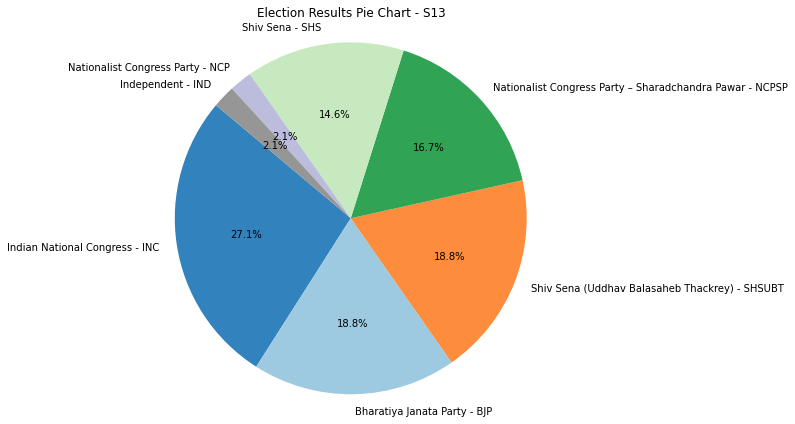

MANIPUR*******************************************************************************
                                        Party Won
Serial Number                                    
0              Indian National Congress - INC   2


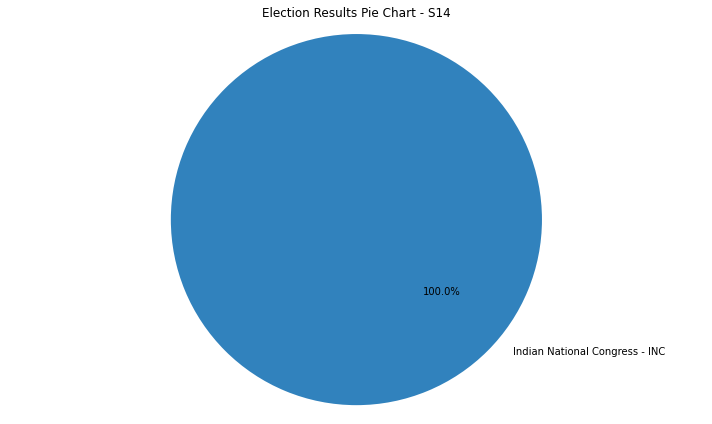

MEGHALAYA*******************************************************************************
                                           Party Won
Serial Number                                       
0              Voice of the People Party - VOTPP   1
1                 Indian National Congress - INC   1


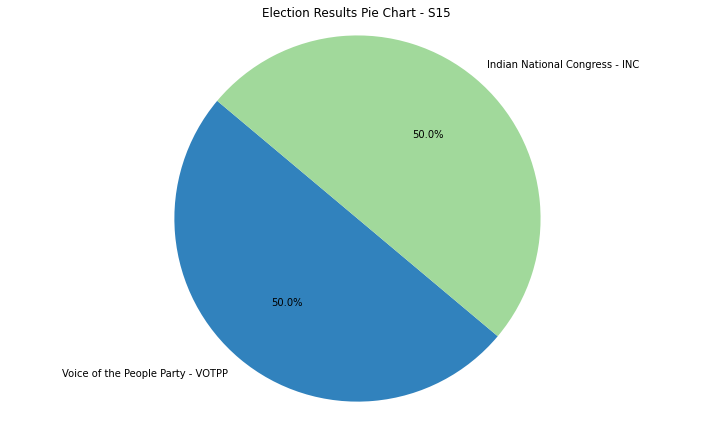

MIZORAM*******************************************************************************
                                       Party Won
Serial Number                                   
0              Zoram People’s Movement - ZPM   1


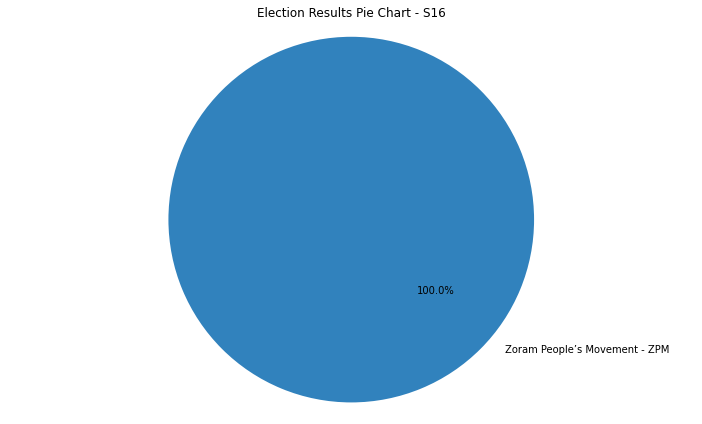

NAGALAND*******************************************************************************
                                        Party Won
Serial Number                                    
0              Indian National Congress - INC   1


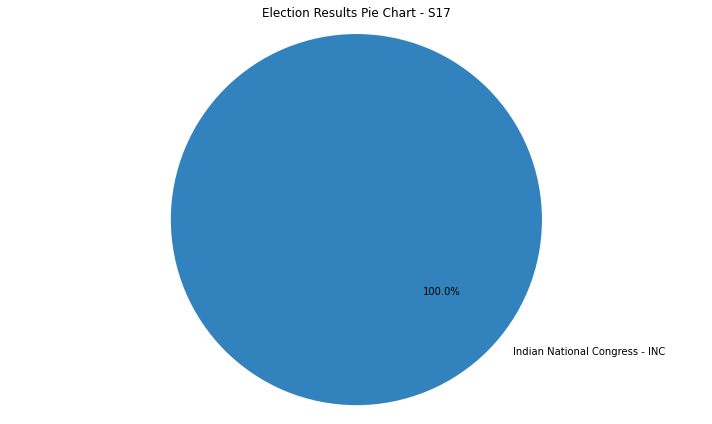

ODISHA*******************************************************************************
                                        Party Won
Serial Number                                    
0                Bharatiya Janata Party - BJP  20
1              Indian National Congress - INC   1


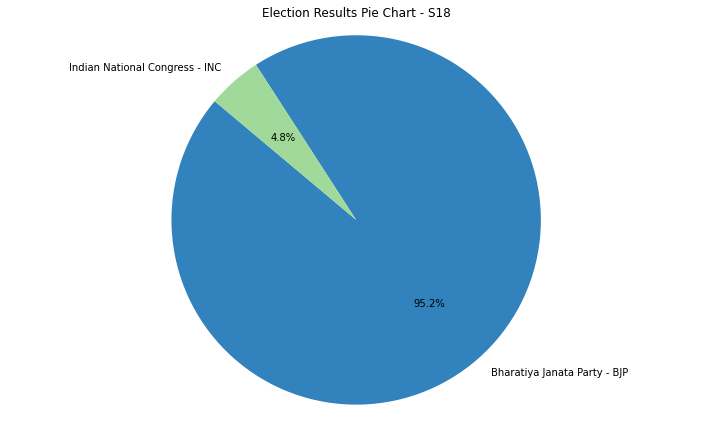

PUNJAB*******************************************************************************
                                        Party Won
Serial Number                                    
0              Indian National Congress - INC   7
1                      Aam Aadmi Party - AAAP   3
2                   Shiromani Akali Dal - SAD   1
3                           Independent - IND   2


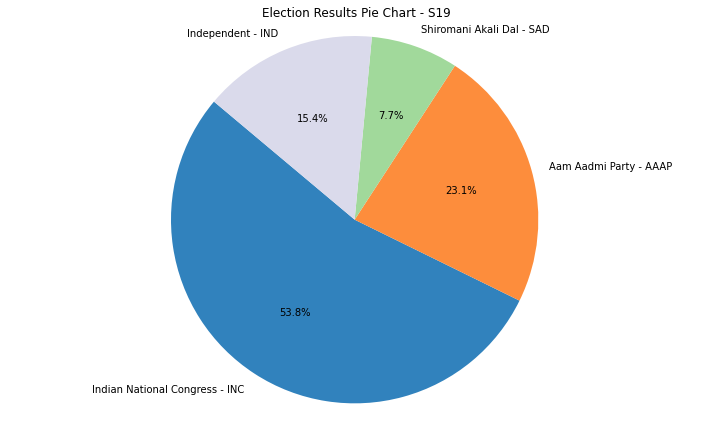

RAJASTHAN*******************************************************************************
                                                      Party Won
Serial Number                                                  
0                              Bharatiya Janata Party - BJP  14
1                            Indian National Congress - INC   8
2              Communist Party of India  (Marxist) - CPI(M)   1
3                         Rashtriya Loktantrik Party - RLTP   1
4                         Bharat Adivasi Party - BHRTADVSIP   1


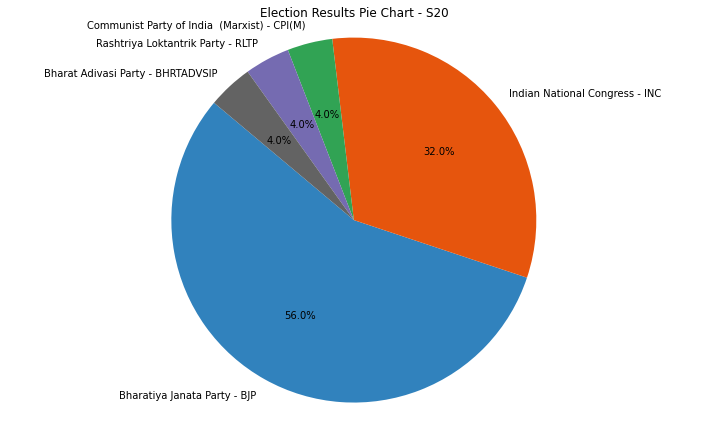

SIKKIM*******************************************************************************
                                        Party Won
Serial Number                                    
0              Sikkim Krantikari Morcha - SKM   1


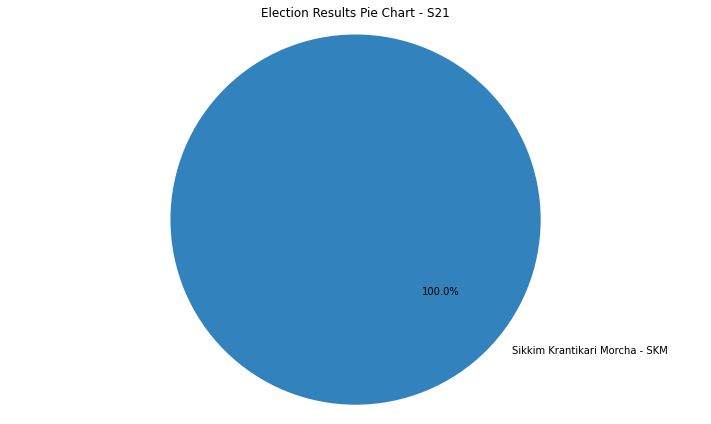

TAMIL NADU*******************************************************************************
                                                       Party Won
Serial Number                                                   
0                            Dravida Munnetra Kazhagam - DMK  22
1                             Indian National Congress - INC   9
2                       Viduthalai Chiruthaigal Katchi - VCK   2
3                             Communist Party of India - CPI   2
4               Communist Party of India  (Marxist) - CPI(M)   2
5              Marumalarchi Dravida Munnetra Kazhagam - MDMK   1
6                          Indian Union Muslim League - IUML   1


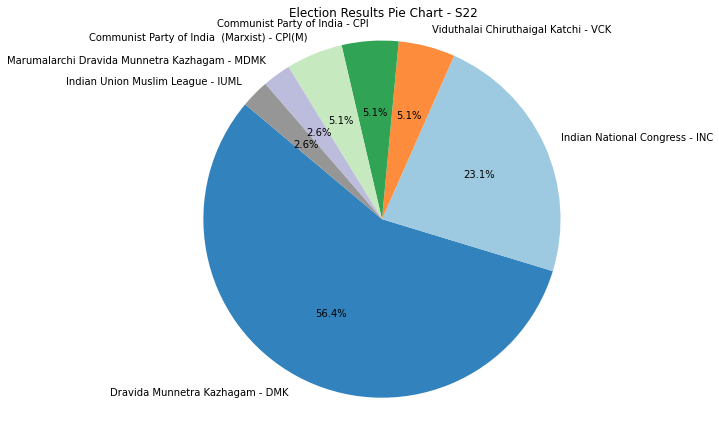

TELANGANA*******************************************************************************
                                                        Party Won
Serial Number                                                    
0                                Bharatiya Janata Party - BJP   8
1                              Indian National Congress - INC   8
2              All India Majlis-E-Ittehadul Muslimeen - AIMIM   1


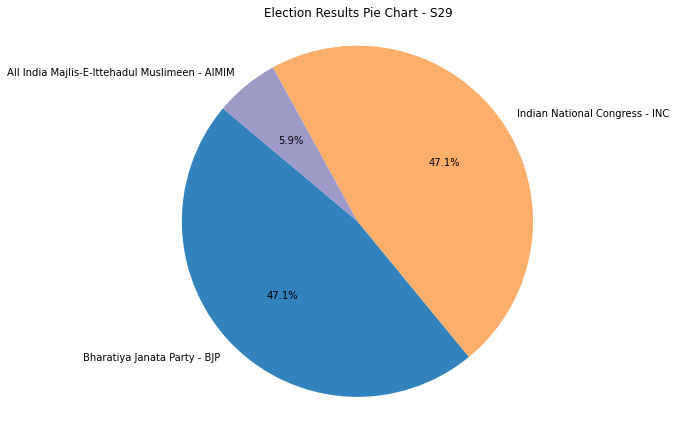

TRIPURA*******************************************************************************
                                      Party Won
Serial Number                                  
0              Bharatiya Janata Party - BJP   2


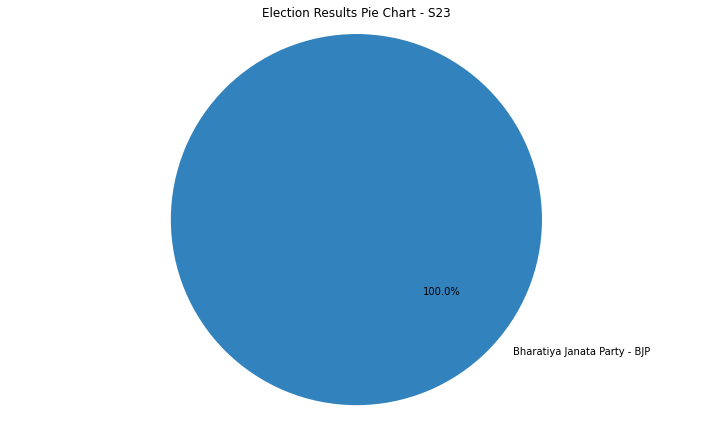

UTTAR PRADESH*******************************************************************************
                                                Party Won
Serial Number                                            
0                                Samajwadi Party - SP  37
1                        Bharatiya Janata Party - BJP  33
2                      Indian National Congress - INC   6
3                             Rashtriya Lok Dal - RLD   2
4              Aazad Samaj Party (Kanshi Ram) - ASPKR   1
5                          Apna Dal (Soneylal) - ADAL   1


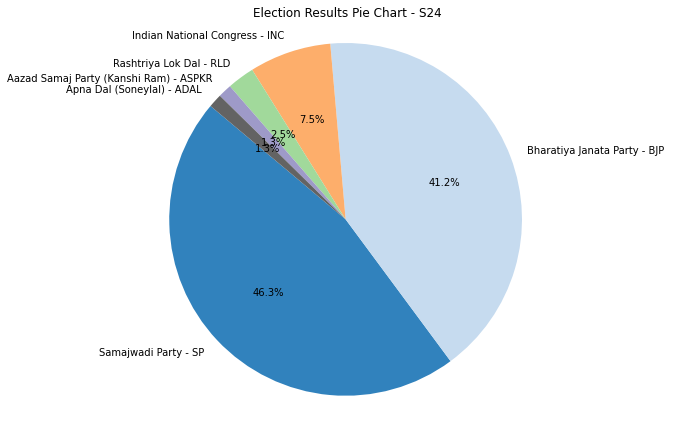

UTTARAKHAND*******************************************************************************
                                      Party Won
Serial Number                                  
0              Bharatiya Janata Party - BJP   5


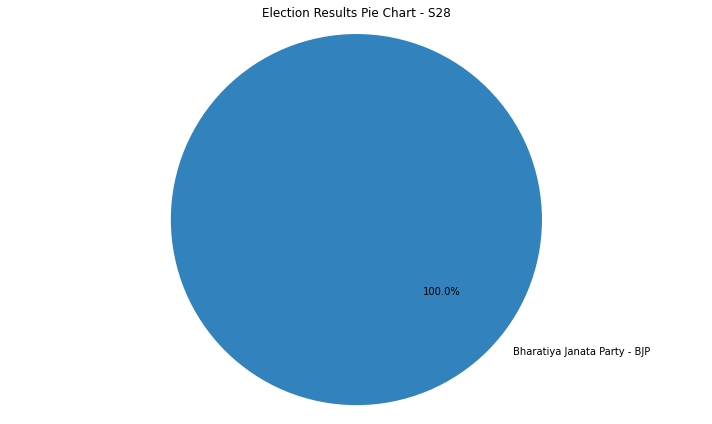

WEST BENGAL*******************************************************************************
                                             Party Won
Serial Number                                         
0              All India Trinamool Congress - AITC  29
1                     Bharatiya Janata Party - BJP  12
2                   Indian National Congress - INC   1


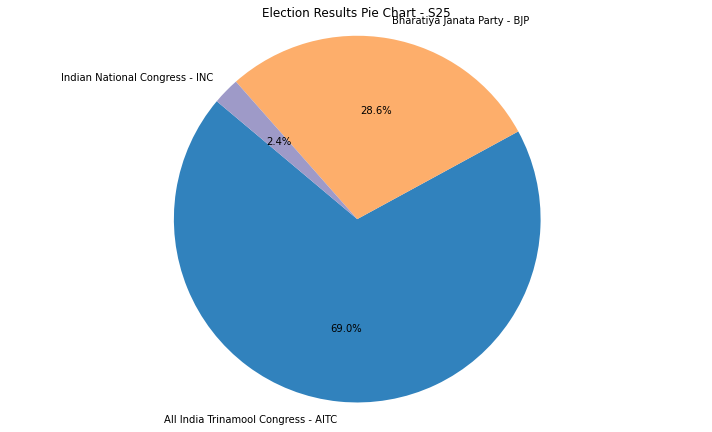

In [18]:
# ANSI color codes for different colors
colors = [
    '\033[91m',   # Red
    '\033[92m',   # Green
    '\033[93m',   # Yellow
    '\033[94m',   # Blue
    '\033[95m',   # Magenta
    '\033[96m',   # Cyan
]

bold = "\033[1m"

# Iterate over each state and print its name in a random color
for state_code, state_name in state_dict.items():
    color = random.choice(colors)  
    print(f"{color}{bold}{state_name.upper()}\033[0m" + "*******************************************************************************")  # Reset color after printing
    scrape_state_election_results(state_code)

# Insights form each state:

1.Regional parties like Samajwadi Party (SP) in Uttar Pradesh and All India Trinamool Congress (AITC) in West Bengal have secured notable victories, winning 37 and 29 seats , Parties like Telugu Desam (TDP) in Andhra Pradesh and Yuvajana Sramika Rythu Congress Party (YSRCP) have maintained influence in the southern states, winning 16 and 4 seats respectively.

2.The Communist Party of India (Marxist) [CPI(M)] won seats in Kerala, Rajasthan, and Tamil Nadu, with a total of 4 seats.The Indian Union Muslim League (IUML) won seats in Kerala and Tamil Nadu, with a total of 3 seats.

3.Bihar had the highest participation with 8 different parties contesting in the elections.

4.Sikkim, Mizoram, and Arunachal Pradesh had the least participation with just one party each contesting in the elections.


All 10 insights:

1. BJP secured the highest vote percentage (36.56%) and won the most seats (240), showing popular suppport to party.


2. Even though Indian National Congress (INC) secured the second-highest vote percentage (21.19%) but won significantly fewer seats (99), indicating a disparity between vote share and seat allocation.


3. The distribution of vote shares ranges widely, with major parties like "BJP" and "INC" securing significant portions, while smaller parties have less than 1% vote share. This highlights BJP and INC as the dominant participants and also reflects the diversity of political representation.



4. Regional parties like Samajwadi Party (SP) in Uttar Pradesh and All India Trinamool Congress (AITC) in West Bengal have secured notable victories, winning 37 and 29 seats , Parties like Telugu Desam (TDP) in Andhra Pradesh and Yuvajana Sramika Rythu Congress Party (YSRCP) have maintained influence in the southern states, winning 16 and 4 seats respectively.



5. Shiv Sena (SHSUBT) and its coalition partner Nationalist Congress Party (NCP) have collectively won 17 seats in Maharashtra, illustrating their combined strength.Janata Dal (United) (JD(U)) and BJP have each won 12 seats in Bihar, showcasing a strong coalition in the state.



6. The Communist Party of India (Marxist) [CPI(M)] won seats in Kerala, Rajasthan, and Tamil Nadu, with a total of 4 seats.The Indian Union Muslim League (IUML) won seats in Kerala and Tamil Nadu, with a total of 3 seats.



8. National parties won 62% of the seats, while regional parties won 38% among all the seats in Lok sabha electoins.


9. Bihar had the highest participation with 8 different parties contesting in the elections.Sikkim, Mizoram, and Arunachal Pradesh had the least participation with just one party each contesting in the elections.



10. BJP has the strongest representation in Uttar Pradesh (33 seats), while INC is strongest in Kerala (14 seats).